In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_db = pd.read_csv("/gdrive/My Drive/ml_datasets/cosmicresearchml/train_db.csv")
test_db = pd.read_csv("/gdrive/My Drive/ml_datasets/cosmicresearchml/test_db.csv")

In [ ]:
train_db.head()

,match_id,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,...,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win
0,0.0,62.0,0.0,611.0,608.0,2.0,0.0,7.0,9.0,97.0,1.0,1900.0,1494.0,22.0,0.0,7.0,3.0,7.0,0.0,688.0,1219.0,3.0,2.0,1.0,11.0,1.0,0.0,1610.0,1869.0,21.0,0.0,4.0,9.0,22.0,1.0,1485.0,681.0,4.0,0.0,1.0,...,6.0,16.0,44.0,0.0,1245.0,1360.0,18.0,0.0,7.0,7.0,106.0,0.0,1924.0,1156.0,15.0,0.0,4.0,8.0,81.0,0.0,3.0,6.0,17.0,-79.0,NaN,2.0,2.0,2.0,0.0,57.0,194.0,-82.0,254.0,4.0,3.0,1.0,1.0,41.0,2336.0,1
1,1.0,21.0,0.0,1911.0,1743.0,29.0,0.0,6.0,8.0,98.0,0.0,1242.0,1413.0,20.0,0.0,5.0,8.0,14.0,0.0,853.0,543.0,1.0,0.0,5.0,9.0,22.0,0.0,1537.0,953.0,11.0,0.0,6.0,7.0,104.0,0.0,856.0,1060.0,17.0,0.0,8.0,...,9.0,10.0,32.0,0.0,1029.0,1135.0,6.0,1.0,2.0,11.0,44.0,0.0,1242.0,1022.0,11.0,0.0,2.0,7.0,127.0,1.0,6.0,0.0,119.0,-79.0,272.0,2.0,4.0,2.0,0.0,-15.0,60.0,-86.0,NaN,1.0,4.0,2.0,0.0,-17.0,3207.0,0
2,2.0,11.0,0.0,886.0,1127.0,14.0,0.0,14.0,9.0,104.0,0.0,2290.0,2098.0,18.0,2.0,11.0,7.0,2.0,0.0,1150.0,1035.0,20.0,0.0,6.0,7.0,26.0,0.0,793.0,694.0,0.0,1.0,16.0,9.0,1.0,0.0,1869.0,1322.0,20.0,0.0,7.0,...,8.0,10.0,74.0,0.0,2097.0,1505.0,21.0,0.0,6.0,10.0,76.0,0.0,1919.0,1592.0,26.0,0.0,6.0,6.0,114.0,1.0,5.0,3.0,88.0,-82.0,210.0,2.0,2.0,2.0,0.0,27.0,NaN,-86.0,277.0,6.0,2.0,2.0,0.0,23.0,3025.0,0
3,3.0,31.0,0.0,1539.0,669.0,4.0,0.0,10.0,7.0,14.0,0.0,2638.0,1750.0,7.0,2.0,2.0,8.0,21.0,0.0,1138.0,1202.0,10.0,1.0,0.0,5.0,94.0,0.0,836.0,1046.0,5.0,1.0,0.0,11.0,7.0,0.0,881.0,691.0,2.0,0.0,0.0,...,12.0,4.0,36.0,0.0,903.0,876.0,7.0,1.0,6.0,9.0,100.0,0.0,788.0,932.0,2.0,0.0,6.0,10.0,72.0,0.0,2.0,8.0,172.0,-83.0,NaN,4.0,4.0,3.0,0.0,48.0,76.0,-73.0,NaN,4.0,5.0,2.0,0.0,158.0,2192.0,1
4,4.0,47.0,2.0,1947.0,1378.0,19.0,0.0,5.0,6.0,112.0,1.0,494.0,541.0,1.0,0.0,2.0,12.0,104.0,1.0,951.0,989.0,18.0,0.0,1.0,7.0,32.0,1.0,1367.0,790.0,7.0,0.0,4.0,7.0,21.0,1.0,1350.0,1403.0,22.0,0.0,2.0,...,7.0,6.0,10.0,1.0,1290.0,1116.0,14.0,0.0,9.0,13.0,70.0,1.0,862.0,1026.0,21.0,0.0,7.0,3.0,NaN,NaN,NaN,NaN,159.0,-66.0,NaN,2.0,2.0,2.0,0.0,35.0,-68.0,-73.0,NaN,4.0,1.0,0.0,0.0,NaN,2385.0,1


In [ ]:
X = train_db.loc[:, train_db.columns != 'radiant_win']
Y = train_db.loc[:, train_db.columns == 'radiant_win']

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_SEED)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
X_train_new = pd.DataFrame(my_imputer.fit_transform(X_train))
X_test_new = pd.DataFrame(my_imputer.fit_transform(X_test))

In [ ]:
tree_model.fit(X_train_new, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(tree_model, X_test_new, Y_test, cv=5, scoring='roc_auc', n_jobs=-1)))
print(np.mean(cross_val_score(tree_model, X_train_new, Y_train, cv=5, scoring='roc_auc', n_jobs=-1)))

0.8361493857795086


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.9130404965211639


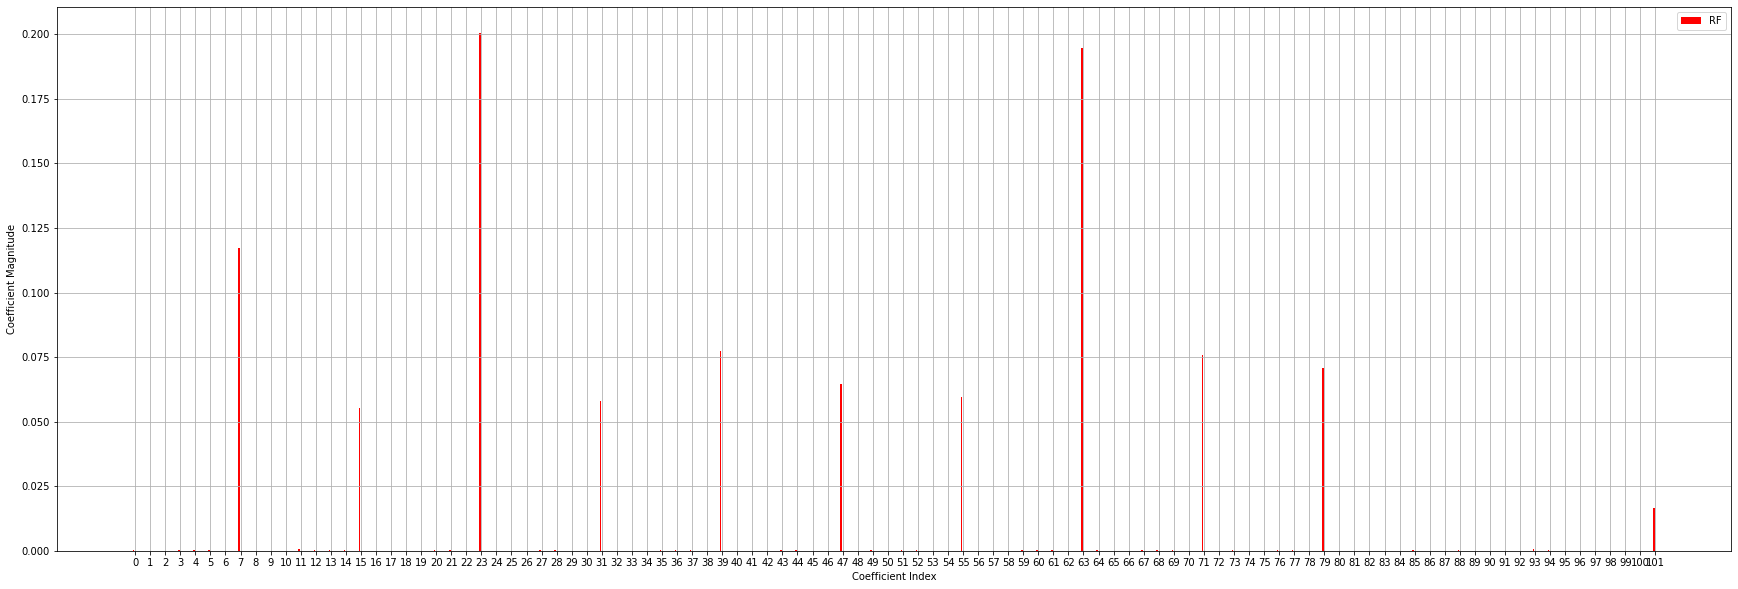

In [ ]:
rf_model_coefs = tree_model.feature_importances_
#rf_scaled__model_coefs = rf_scaled.feature_importances_
ncoef = rf_model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(30,10))
plt.bar(default_x - 0.1, rf_model_coefs, label="RF", width=0.1, color = 'red')
#plt.bar(default_x + 0.1, rf_scaled__model_coefs, label="RF Scaled", width=0.1, color = 'blue')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [ ]:
important_feature_idx = rf_model_coefs.argsort()[-11:][::-1]

In [ ]:
X_train_smaller = X_train_new[important_feature_idx]
X_test_smaller = X_test_new[important_feature_idx]

In [ ]:
X_train_smaller.head()

,23,63,7,39,71,79,47,55,31,15,101
0,14.0,10.0,12.0,0.0,7.0,12.0,8.0,7.0,8.0,7.0,3200.0
1,1.0,7.0,5.0,4.0,7.0,10.0,9.0,7.0,5.0,4.0,1708.0
2,7.0,12.0,4.0,4.0,9.0,7.0,9.0,10.0,6.0,7.0,2563.0
3,4.0,14.0,23.0,8.0,9.0,15.0,5.0,11.0,11.0,7.0,3748.0
4,4.0,5.0,7.0,8.0,4.0,0.0,0.0,0.0,3.0,2.0,1416.0


In [ ]:
tree_model_small = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_model_small.fit(X_train_smaller, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(np.mean(cross_val_score(tree_model_small, X_test_smaller, Y_test, cv=5, scoring='roc_auc', n_jobs=-1)))
print(np.mean(cross_val_score(tree_model_small, X_train_smaller, Y_train, cv=5, scoring='roc_auc', n_jobs=-1)))

0.8710646088055267
0.9159134008575555


##########################################################################

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier() #n_estimators=184, n_jobs=-1, max_features=15

In [ ]:
rf_model.fit(X_train_new, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(np.mean(cross_val_score(rf_model, X_test_new, Y_test, cv=5, scoring='roc_auc', n_jobs=-1)))
print(np.mean(cross_val_score(rf_model, X_train_new, Y_train, cv=5, scoring='roc_auc', n_jobs=-1)))

0.9454601252836893


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.9493580746964293


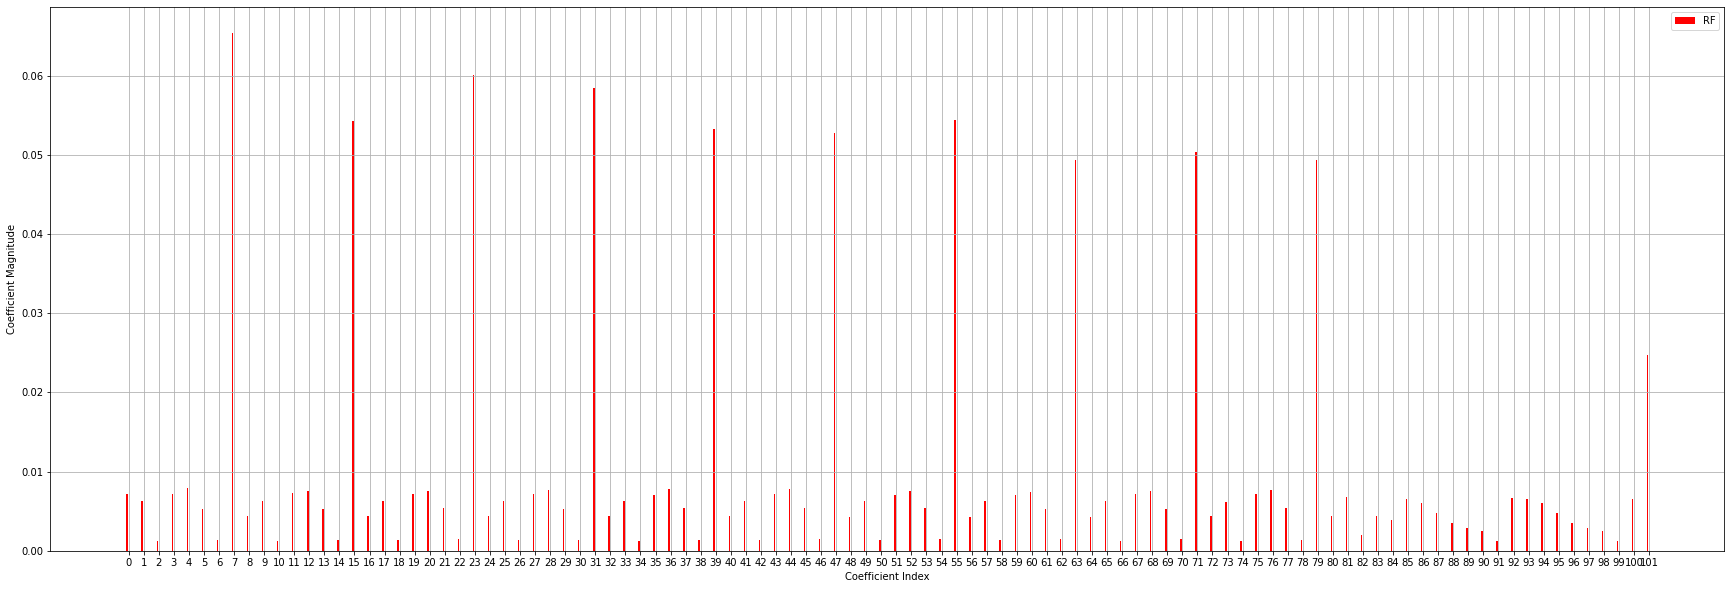

In [ ]:
rf_model_coefs = rf_model.feature_importances_
#rf_scaled__model_coefs = rf_scaled.feature_importances_
ncoef = rf_model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(30,10))
plt.bar(default_x - 0.1, rf_model_coefs, label="RF", width=0.1, color = 'red')
#plt.bar(default_x + 0.1, rf_scaled__model_coefs, label="RF Scaled", width=0.1, color = 'blue')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [ ]:
important_feature_idx = rf_model_coefs.argsort()[-11:][::-1]
X_train_smaller = X_train_new[important_feature_idx]
X_test_smaller = X_test_new[important_feature_idx]

In [ ]:
rf_model_small = RandomForestClassifier()#n_estimators=184, n_jobs=-1, max_features=11

In [ ]:
rf_model_small.fit(X_train_smaller, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(np.mean(cross_val_score(rf_model_small, X_test_smaller, Y_test, cv=5, scoring='roc_auc', n_jobs=-1)))
print(np.mean(cross_val_score(rf_model_small, X_train_smaller, Y_train, cv=5, scoring='roc_auc', n_jobs=-1)))

0.9471629267480786


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.9500003069098554


№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
forest_clf = RandomForestClassifier()
forest_grid = {
    "n_estimators": np.arange(10,20),
    "max_features": np.arange(1,10)
}

In [ ]:
forest_grid_searcher = GridSearchCV(forest_clf, forest_grid, cv=5, return_train_score=True)
forest_grid_searcher.fit(X_train_smaller, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
res = forest_grid_searcher.cv_results_

In [ ]:
print("Best estimator:", forest_grid_searcher.best_estimator_, "its score:", forest_grid_searcher.best_score_)

Best estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) its score: 0.8612923452354726


2

In [ ]:
forest_clf = RandomForestClassifier()
forest_grid = {
    "n_estimators": np.arange(10,200),
    "max_features": np.arange(1,30)
}

In [ ]:
forest_grid_searcher = GridSearchCV(forest_clf, forest_grid, cv=5, return_train_score=True)
forest_grid_searcher.fit(X_train_smaller, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
from sklearn.metrics import mean_squared_error

In [ ]:
from scipy import stats
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
X_train_new = pd.DataFrame(my_imputer.fit_transform(X_train))
X_test_new = pd.DataFrame(my_imputer.fit_transform(X_test))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=184, n_jobs=-1, max_features=15)

In [ ]:
model.fit(X_train_new, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=184,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
print(np.mean(cross_val_score(model, X_test_new, Y_test, cv=5, scoring='roc_auc', n_jobs=-1)))

0.9486259051292205


In [ ]:
print(np.mean(cross_val_score(model, X_train_new, Y_train, cv=5, scoring='roc_auc', n_jobs=-1)))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.9514100297373741


In [ ]:
test_db.head()

,match_id,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,...,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration
0,5.0,105.0,0.0,938.0,1100.0,1.0,2.0,0.0,8.0,37.0,0.0,874.0,628.0,2.0,0.0,16.0,5.0,34.0,0.0,1642.0,1922.0,19.0,2.0,8.0,10.0,94.0,0.0,1382.0,1151.0,15.0,0.0,11.0,8.0,106.0,0.0,2534.0,2327.0,22.0,1.0,8.0,...,0.0,3.0,6.0,41.0,0.0,943.0,1089.0,12.0,0.0,8.0,10.0,57.0,0.0,719.0,664.0,4.0,0.0,1.0,9.0,-9.0,0.0,2.0,5.0,138.0,-85.0,189.0,4.0,4.0,1.0,0.0,-14.0,226.0,-62.0,NaN,6.0,2.0,2.0,1.0,16.0,2738.0
1,6.0,62.0,0.0,696.0,736.0,1.0,1.0,9.0,6.0,86.0,0.0,935.0,638.0,4.0,0.0,3.0,7.0,74.0,0.0,1529.0,924.0,11.0,0.0,7.0,5.0,100.0,0.0,1307.0,809.0,2.0,0.0,5.0,8.0,46.0,0.0,1973.0,1177.0,15.0,0.0,4.0,...,1.0,11.0,4.0,21.0,0.0,1806.0,1414.0,18.0,0.0,4.0,5.0,61.0,0.0,2002.0,1142.0,12.0,0.0,9.0,7.0,6.0,1.0,7.0,0.0,-85.0,-80.0,NaN,0.0,3.0,1.0,1.0,5.0,193.0,-80.0,NaN,1.0,2.0,2.0,1.0,-14.0,2955.0
2,7.0,78.0,1.0,847.0,982.0,3.0,1.0,10.0,4.0,22.0,1.0,1367.0,696.0,4.0,0.0,9.0,8.0,43.0,1.0,2283.0,1639.0,19.0,0.0,4.0,5.0,75.0,2.0,1233.0,1176.0,14.0,0.0,12.0,9.0,33.0,1.0,854.0,1032.0,15.0,0.0,7.0,...,1.0,15.0,10.0,79.0,1.0,1147.0,1039.0,6.0,0.0,10.0,8.0,29.0,2.0,1696.0,1787.0,11.0,1.0,4.0,13.0,11.0,1.0,5.0,1.0,54.0,-43.0,NaN,4.0,4.0,0.0,0.0,NaN,229.0,-38.0,184.0,3.0,5.0,2.0,0.0,147.0,2827.0
3,11.0,31.0,0.0,1107.0,500.0,0.0,0.0,10.0,6.0,71.0,0.0,627.0,649.0,5.0,0.0,15.0,7.0,95.0,0.0,1810.0,1460.0,23.0,0.0,7.0,13.0,69.0,0.0,901.0,1181.0,14.0,0.0,10.0,7.0,106.0,0.0,815.0,734.0,6.0,0.0,10.0,...,0.0,3.0,9.0,70.0,0.0,1218.0,1375.0,18.0,0.0,3.0,11.0,21.0,0.0,2106.0,1903.0,27.0,0.0,0.0,7.0,-14.0,1.0,6.0,4.0,NaN,-18.0,NaN,2.0,3.0,2.0,0.0,-24.0,114.0,-87.0,197.0,2.0,5.0,2.0,0.0,-33.0,2039.0
4,17.0,19.0,0.0,144.0,551.0,2.0,0.0,11.0,9.0,102.0,2.0,876.0,729.0,2.0,0.0,5.0,8.0,14.0,2.0,1738.0,1193.0,17.0,0.0,6.0,9.0,21.0,2.0,1246.0,1135.0,7.0,1.0,5.0,8.0,104.0,3.0,1367.0,1707.0,27.0,0.0,4.0,...,0.0,3.0,8.0,12.0,3.0,1545.0,1830.0,25.0,0.0,5.0,8.0,17.0,3.0,2268.0,2112.0,25.0,1.0,6.0,11.0,4.0,0.0,3.0,9.0,195.0,-73.0,NaN,0.0,3.0,2.0,1.0,-30.0,129.0,-70.0,NaN,2.0,3.0,2.0,0.0,-11.0,1793.0


In [ ]:
test_db_new = pd.DataFrame(my_imputer.fit_transform(test_db))

In [ ]:
test_db_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
0,5.0,105.0,0.0,938.0,1100.0,1.0,2.0,0.0,8.0,37.0,0.0,874.0,628.0,2.0,0.0,16.0,5.0,34.0,0.0,1642.0,1922.0,19.0,2.0,8.0,10.0,94.0,0.0,1382.0,1151.0,15.0,0.0,11.0,8.0,106.0,0.0,2534.0,2327.0,22.0,1.0,8.0,...,0.0,3.0,6.0,41.0,0.0,943.0,1089.0,12.0,0.0,8.0,10.0,57.0,0.0,719.0,664.0,4.0,0.0,1.0,9.0,-9.0,0.0,2.0,5.0,138.000000,-85.0,189.000000,4.0,4.0,1.0,0.0,-14.000000,226.0,-62.0,220.456379,6.0,2.0,2.0,1.0,16.0,2738.0
1,6.0,62.0,0.0,696.0,736.0,1.0,1.0,9.0,6.0,86.0,0.0,935.0,638.0,4.0,0.0,3.0,7.0,74.0,0.0,1529.0,924.0,11.0,0.0,7.0,5.0,100.0,0.0,1307.0,809.0,2.0,0.0,5.0,8.0,46.0,0.0,1973.0,1177.0,15.0,0.0,4.0,...,1.0,11.0,4.0,21.0,0.0,1806.0,1414.0,18.0,0.0,4.0,5.0,61.0,0.0,2002.0,1142.0,12.0,0.0,9.0,7.0,6.0,1.0,7.0,0.0,-85.000000,-80.0,221.387606,0.0,3.0,1.0,1.0,5.000000,193.0,-80.0,220.456379,1.0,2.0,2.0,1.0,-14.0,2955.0
2,7.0,78.0,1.0,847.0,982.0,3.0,1.0,10.0,4.0,22.0,1.0,1367.0,696.0,4.0,0.0,9.0,8.0,43.0,1.0,2283.0,1639.0,19.0,0.0,4.0,5.0,75.0,2.0,1233.0,1176.0,14.0,0.0,12.0,9.0,33.0,1.0,854.0,1032.0,15.0,0.0,7.0,...,1.0,15.0,10.0,79.0,1.0,1147.0,1039.0,6.0,0.0,10.0,8.0,29.0,2.0,1696.0,1787.0,11.0,1.0,4.0,13.0,11.0,1.0,5.0,1.0,54.000000,-43.0,221.387606,4.0,4.0,0.0,0.0,11.784282,229.0,-38.0,184.000000,3.0,5.0,2.0,0.0,147.0,2827.0
3,11.0,31.0,0.0,1107.0,500.0,0.0,0.0,10.0,6.0,71.0,0.0,627.0,649.0,5.0,0.0,15.0,7.0,95.0,0.0,1810.0,1460.0,23.0,0.0,7.0,13.0,69.0,0.0,901.0,1181.0,14.0,0.0,10.0,7.0,106.0,0.0,815.0,734.0,6.0,0.0,10.0,...,0.0,3.0,9.0,70.0,0.0,1218.0,1375.0,18.0,0.0,3.0,11.0,21.0,0.0,2106.0,1903.0,27.0,0.0,0.0,7.0,-14.0,1.0,6.0,4.0,120.292099,-18.0,221.387606,2.0,3.0,2.0,0.0,-24.000000,114.0,-87.0,197.000000,2.0,5.0,2.0,0.0,-33.0,2039.0
4,17.0,19.0,0.0,144.0,551.0,2.0,0.0,11.0,9.0,102.0,2.0,876.0,729.0,2.0,0.0,5.0,8.0,14.0,2.0,1738.0,1193.0,17.0,0.0,6.0,9.0,21.0,2.0,1246.0,1135.0,7.0,1.0,5.0,8.0,104.0,3.0,1367.0,1707.0,27.0,0.0,4.0,...,0.0,3.0,8.0,12.0,3.0,1545.0,1830.0,25.0,0.0,5.0,8.0,17.0,3.0,2268.0,2112.0,25.0,1.0,6.0,11.0,4.0,0.0,3.0,9.0,195.000000,-73.0,221.387606,0.0,3.0,2.0,1.0,-30.000000,129.0,-70.0,220.456379,2.0,3.0,2.0,0.0,-11.0,1793.0


In [ ]:
pred = model.predict(test_db_new)

In [ ]:
len(pred)

81958

In [ ]:
len(test_db_new.index)

81958

In [ ]:
for_submit = pd.DataFrame({'match_id': test_db_new[0], 'radiant_win': pred})
for_submit.head()

,match_id,radiant_win
0,5.0,0
1,6.0,1
2,7.0,1
3,11.0,0
4,17.0,0


In [ ]:
for_submit1 = pd.read_csv("/gdrive/My Drive/ml_datasets/cosmicresearchml/baseline_submission.csv")
for_submit1.head()

,match_id,radiant_win
0,5.0,0.824662
1,6.0,0.332706
2,7.0,0.306040
3,11.0,0.306682
4,17.0,0.246378


In [ ]:
len(for_submit1.index)

81958

In [ ]:
for_submit.to_csv('/gdrive/My Drive/ml_datasets/cosmicresearchml/submission.csv', encoding='utf-8', index=False)

№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№

**Decision Tree**

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_grid = {
    "max_depth": np.arange(1,50)
}

In [ ]:
tree_grid_searcher = GridSearchCV(tree_clf, tree_grid, cv=5, return_train_score=True)
tree_grid_searcher.fit(X_train_new, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  

In [ ]:
res_tree = tree_grid_searcher.cv_results_

In [ ]:
tree_means = res_tree['mean_test_score']
tree_stds = res_tree['std_test_score']

No handles with labels found to put in legend.


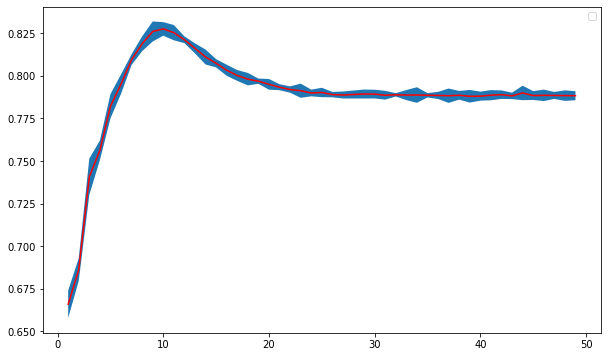

In [ ]:
plt.figure(figsize=(10, 6))
xs = tree_grid_searcher.param_grid["max_depth"]
plt.plot(xs, tree_means, color='red')
plt.fill_between(xs, tree_means + 3 * tree_stds, tree_means - 3 * tree_stds)
plt.legend()
plt.show()

In [ ]:
print("Best estimator:", tree_grid_searcher.best_estimator_, "its score:", tree_grid_searcher.best_score_)

Best estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') its score: 0.8275957904726396


In [ ]:
tree_clf = DecisionTreeClassifier()
tree_grid = {
    "max_depth": np.arange(1,50),
    "criterion": ('gini', 'entropy')
}

In [ ]:
tree_grid_searcher = GridSearchCV(tree_clf, tree_grid, cv=5, return_train_score=True)
tree_grid_searcher.fit(X_train, y_train)

In [ ]:
tree_cl1 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**RandomForest**

In [ ]:
forest_clf = RandomForestClassifier()
forest_grid = {
    "n_estimators": np.arange(10,50)
}

In [ ]:
forest_grid_searcher = GridSearchCV(forest_clf, forest_grid, cv=5, return_train_score=True)
forest_grid_searcher.fit(X_train_new, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 